In [1]:
%run rs2th_functions.ipynb

In [2]:
niter = 20;

In [3]:
# RVCH 
ft = np.array([1,  10, 20,  100.0]);  # frequency table
rt = np.array([1,  15, 15,  3]);  # response spectrum table

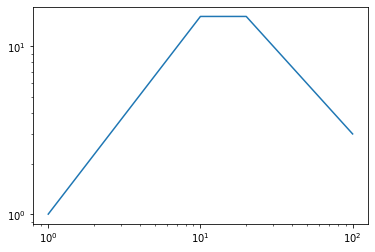

In [4]:
plt.loglog(ft,rt);

In [5]:
tmax = 36.375; fmax=100;
dt = 1/(2*fmax); t = np.arange(0,tmax+dt,dt)

In [6]:
## frequency table 작성
Nt = len(t); df = fmax/(Nt//2);
freq = np.arange(df, fmax+df, df);

In [7]:
## log-log interpolation
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

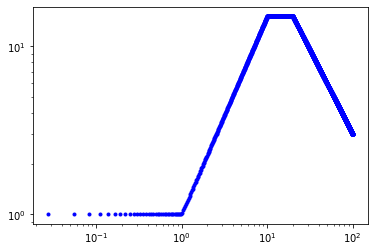

In [8]:
plt.loglog(freq,rs,'b.');

In [9]:
th = np.random.random(len(t));
An = np.zeros(len(rs));
freq,rs_syn = srs_iso(freq,th,0.05,dt);

In [10]:
for k in range(niter):
    An = rs/rs_syn;
    ft_th = np.fft.fft(th);
    ft_th[:Nt//2] *= An
    ft_th[-(Nt//2):] *= np.flip(An);
    th = np.fft.ifft(ft_th)
    th[np.where(np.abs(th)==max(np.abs(th)))] /= 2;
    freq,rs_syn = srs_iso(freq,th,0.05,dt);

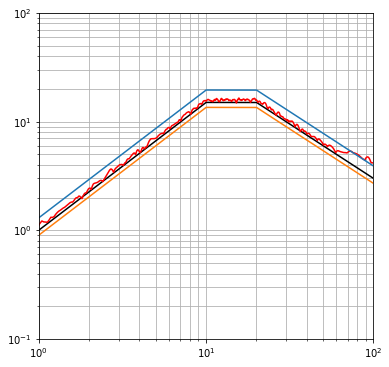

In [11]:
th *= 1.05;
freq,rs_syn = srs_iso(freq,th,0.05,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

In [12]:
fileO(freq,rs_syn,'rs_syn_fft1.txt');

In [13]:
fileO(t,th.real,'th_syn_fft1.txt');

In [14]:
# s-transform
fmin = min(freq);
fmin_samples = int(fmin/df); fmax_samples = int(fmax/df);
extent = (t[0], t[-1], fmin, fmax)
stock = st.st(th.real, fmin_samples, fmax_samples)
asp = (extent[1]-extent[0])/(extent[3]-extent[2]);

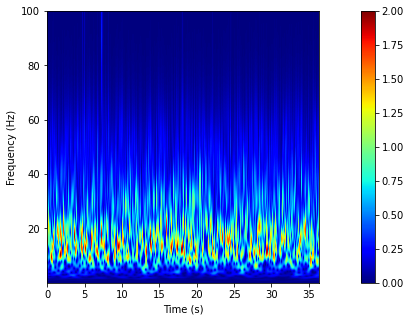

In [15]:
fig2 = plt.figure(figsize=(15,5));
a2 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=asp,cmap='jet',vmin=0,vmax=2);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); #plt.title('modified th');
fig2.colorbar(a2);
plt.show()
fig2.savefig('stock_fft1.png', dpi=1500); 

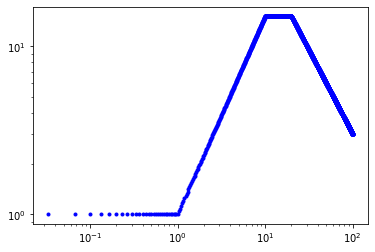

In [16]:
tmax = 30; fmax=100;
dt = 1/(2*fmax); t = np.arange(0,tmax+dt,dt)

## frequency table 작성
Nt = len(t); df = fmax/(Nt//2);
freq = np.arange(df, fmax+df, df);

## log-log interpolation
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

plt.loglog(freq,rs,'b.');

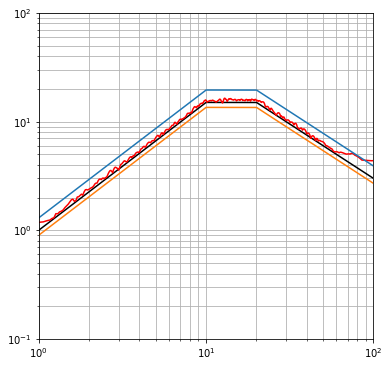

In [17]:
th = np.random.random(len(t));
An = np.zeros(len(rs));
freq,rs_syn = srs_iso(freq,th,0.05,dt);

for k in range(niter):
    An = rs/rs_syn;
    ft_th = np.fft.fft(th);
    ft_th[:Nt//2] *= An
    ft_th[-(Nt//2):] *= np.flip(An);
    th = np.fft.ifft(ft_th)
    th[np.where(np.abs(th)==max(np.abs(th)))] /= 2;
    freq,rs_syn = srs_iso(freq,th,0.05,dt);

th *= 1.05;
freq,rs_syn = srs_iso(freq,th,0.05,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

In [18]:
fileO(freq,rs_syn,'rs_syn_fft2.txt');

In [19]:
fileO(t,th.real,'th_syn_fft2.txt');

In [20]:
# s-transform
fmin = min(freq);
fmin_samples = int(fmin/df); fmax_samples = int(fmax/df);
extent = (t[0], t[-1], fmin, fmax)
stock = st.st(th.real, fmin_samples, fmax_samples)
asp = (extent[1]-extent[0])/(extent[3]-extent[2]);

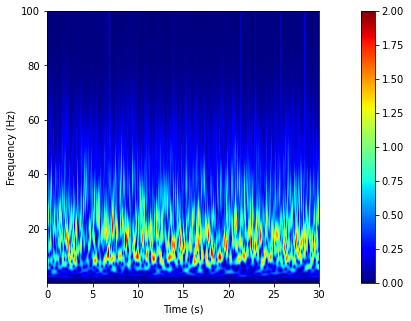

In [21]:
fig2 = plt.figure(figsize=(15,5));
a2 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=asp,cmap='jet',vmin=0,vmax=2);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); #plt.title('modified th');
fig2.colorbar(a2);
plt.show()
fig2.savefig('stock_fft2.png', dpi=1500); 